# OCR

We show how the pipeline performs OCR and how to inspect the results.

Reference: [ocr](https://among.github.io/fusus/fusus/ocr.html).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fusus.book import Book

In [3]:
B = Book(cd="~/github/among/fusus/example")

In [4]:
# cd to the book directory
!cd `pwd`

# Task runner

The following function runs the pipeline for one or more pages.

If all pages are selected, batch mode is on.

In [5]:
def checkOcr(pg, quiet=True, **kwargs):
    if pg is None:
        for pg in B.allPagesList:
            page = B.process(
                batch=False,
                pages=pg,
                doOcr=True,
                quiet=quiet,
                **kwargs,
            )
            page.show(stage="proofword,proofchar")
    return B.process(
        batch=False,
        pages=pg,
        doOcr=True,
        quiet=quiet,
        **kwargs,
    )

# Check a single page

Our first example is page 132.

The OCR result is shown in data form and as a proof page.

In [6]:
page = checkOcr(132)

  0.00s Batch of 1 pages: 132
  0.00s Start batch processing images
   |     1.35s Loading for Kraken: ~/github/among/fusus/model/arabic_generalized.mlmodel
   |     8.86s model loaded
   |       15s     1 132.jpg                                 
    15s all done


Here is the page image with the detected layout:

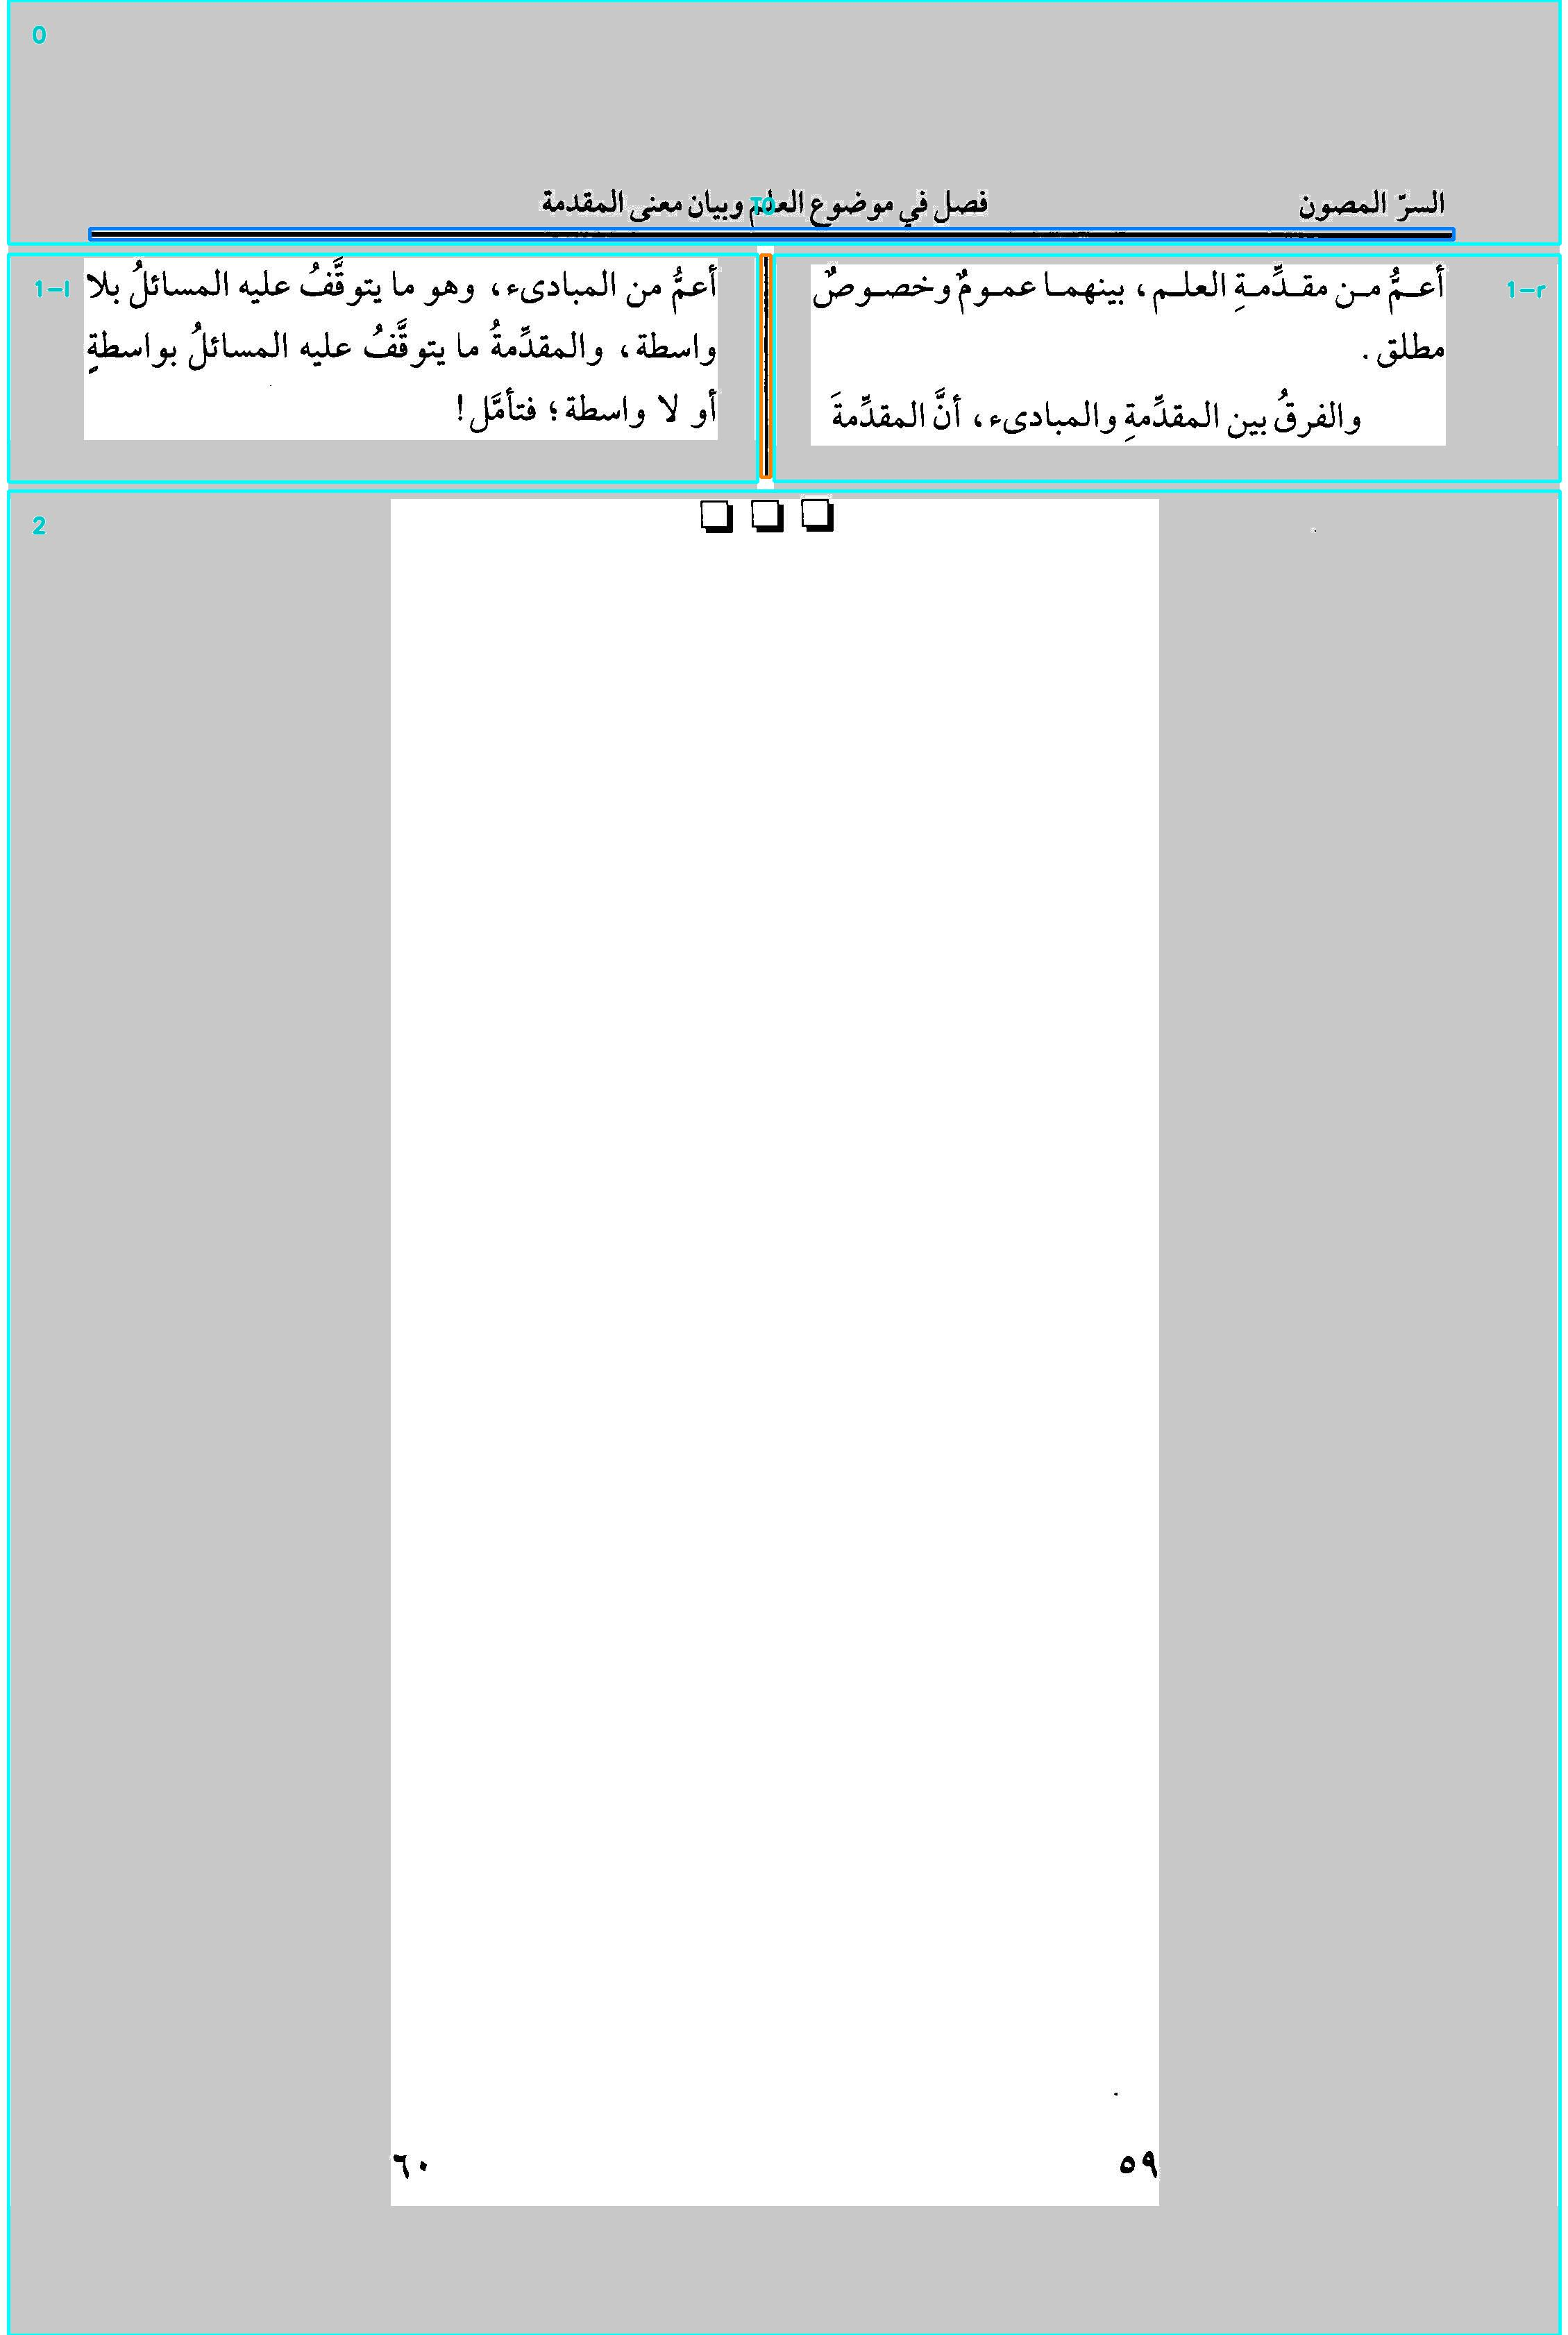

In [7]:
page.show(stage="layout")

We can inspect the results of the OCR by calling for a proof:

In [8]:
page.show("proofword")

There is a proof page at character level as well.

In [9]:
page.show(stage="proofchar")

**N.B.:** If you work with a file in an online GitHub repo, and if your local files are in a directory
under `~/github/`, then the links above will show those files in NB-Viewer, provided the repo in question has been
pushed to GitHub.

If you are experimenting locally, you can use the paths to the local files to open them
in your browser yourself.

We can also ask for the OCR data.

Here are the line, word, and character data:

In [10]:
page.show(stage="line")

page	stripe	block	line	left	top	right	bottom
1	l	1	123	372	1032	449
1	l	2	123	459	1032	543
1	l	3	373	553	1032	634
1	r	1	1170	381	2081	457
1	r	2	1948	471	2081	537
1	r	3	1181	551	1976	642
2		1	993	719	1217	1061
2		2	565	2805	1668	3178


For the terms *stripe*, *column* and *line*,
see: [layout](https://among.github.io/fusus/fusus/layout.html).

In [11]:
page.show(stage="word")

page	stripe	block	line	left	top	right	bottom	confidence	letters	punc
1	l	1	950	372	1029	450	100	أعم	 
1	l	1	885	372	950	450	89	من	 
1	l	1	677	372	885	450	97	المبادىء	، 
1	l	1	591	372	676	450	96	وهو	 
1	l	1	547	372	592	450	98	ما	 
1	l	1	407	372	547	450	93	يتوقف	 
1	l	1	324	372	406	450	98	عليه	 
1	l	1	171	372	325	450	100	المسائل	 
1	l	1	123	372	171	450	100	بلا	
1	l	2	905	459	1029	544	100	واسطة	 
1	l	2	870	459	905	544	100		، 
1	l	2	687	459	870	544	96	والمقدمة	 
1	l	2	640	459	687	544	93	ما	 
1	l	2	500	459	641	544	95	يتوقف	 
1	l	2	415	459	500	544	93	عليه	 
1	l	2	253	459	416	544	96	المسائل	 
1	l	2	123	459	254	544	100	بواسطة	
1	l	3	983	553	1025	635	99	و	 
1	l	3	930	553	983	635	100	لا	 
1	l	3	801	553	930	635	92	واسطة	 
1	l	3	770	553	801	635	100		؛ 
1	l	3	373	553	771	635	93	فتأمل	!
1	r	1	1991	381	2078	458	100	أعـم	 
1	r	1	1912	381	1990	458	99	من	 
1	r	1	1770	381	1912	458	96	مقدمة	 
1	r	1	1619	381	1770	458	97	العلم	، 
1	r	1	1487	381	1619	458	99	بينهما	 
1	r	1	1369	381	1487	458	100	عموم	 
1	r	1	1

Here is the OCR data at character level:

In [12]:
page.show(stage="char")

page	stripe	block	line	left	top	right	bottom	confidence	letters
1	l	1	1021	372	1029	450	100	ا
1	l	1	1008	372	1022	450	100	ٔ
1	l	1	984	372	1008	450	99	ع
1	l	1	964	372	984	450	100	م
1	l	1	950	372	963	450	100	 
1	l	1	926	372	950	450	69	م
1	l	1	902	372	926	450	100	ن
1	l	1	885	372	902	450	99	 
1	l	1	871	372	885	450	100	ا
1	l	1	858	372	872	450	74	ل
1	l	1	834	372	857	450	100	م
1	l	1	820	372	834	450	100	ب
1	l	1	800	372	820	450	100	ا
1	l	1	779	372	799	450	93	د
1	l	1	748	372	779	450	100	ى
1	l	1	721	372	748	450	100	ء
1	l	1	701	372	721	450	99	،
1	l	1	677	372	700	450	100	 
1	l	1	656	372	676	450	91	و
1	l	1	632	372	656	450	100	ه
1	l	1	612	372	632	450	94	و
1	l	1	591	372	611	450	100	 
1	l	1	574	372	592	450	99	م
1	l	1	557	372	574	450	96	ا
1	l	1	547	372	557	450	98	 
1	l	1	533	372	547	450	90	ي
1	l	1	520	372	533	450	100	ت
1	l	1	499	372	519	450	67	و
1	l	1	479	372	499	450	100	ق
1	l	1	445	372	478	450	100	ف
1	l	1	407	372	444	450	100	 
1	l	1	390	372	406	450	97	ع
1	l	1	369	372	389	450	91	ل
1	l	1	356	372	369	450	

# Statistics

Here is some statistics about the general quality of the OCR for this page.
See [measureOcr.ipynb](measureOcr.ipynb) for more.

In [13]:
B.measureQuality(132)

    33s Batch of 1 pages: 132
    33s Start measuring ocr quality of these images
   |     0.00s word-confidences of OCR results for 1 pages   


item,# of words,min,max,average,notes
overall,43,68,100,96,
p132,43,68,100,96,


   |     0.01s char-confidences of OCR results for 1 pages


item,# of chars,min,max,average,notes
overall,211,50,100,96,
p132,211,50,100,96,


   |     0.01s by-char-confidences of OCR results for 32 characters


    33s all done


**N.B.:** If you work with a file in an online GitHub repo, and if your local file is in a directory
under `~/github/`, then the links above refer to files in NB-Viewer, provided the repo in question has been
pushed to GitHub.

If you are experimenting locally, you see the path to the local file when you hover over it, and you have to open it
in your browser yourself.

**For developers**

If you are tweaking the generation and formatting of the proof pages, you do not need to perform the costly OCR process over and over again.
The following method regenerates the proof pages on the basis of the existing OCR data.

In [14]:
page.proofing()

If you need to regenerate all proofing pages, this will work:

```
B.measureQuality(None, updateProofs=True)
```

# Check all pages

Now we check all example pages in batch

In [15]:
page = checkOcr(None)

  0.00s Batch of 1 pages: 47
  0.00s Start batch processing images
   |     3.21s     1 047.tif                                 
  3.22s all done


  0.00s Batch of 1 pages: 48
  0.00s Start batch processing images
   |     2.98s     1 048.tif                                 
  2.98s all done


  0.00s Batch of 1 pages: 58
  0.00s Start batch processing images
   |     2.71s     1 058.tif                                 
  2.71s all done


  0.00s Batch of 1 pages: 59
  0.00s Start batch processing images
   |     3.81s     1 059.tif                                 
  3.81s all done


  0.00s Batch of 1 pages: 63
  0.00s Start batch processing images
   |     3.78s     1 063.tif                                 
  3.78s all done


  0.00s Batch of 1 pages: 67
  0.00s Start batch processing images
   |     3.70s     1 067.tif                                 
  3.70s all done


  0.00s Batch of 1 pages: 101
  0.00s Start batch processing images
   |     4.79s     1 101.jpg                                 
  4.79s all done


  0.00s Batch of 1 pages: 102
  0.00s Start batch processing images
   |     5.81s     1 102.jpg                                 
  5.81s all done


  0.00s Batch of 1 pages: 111
  0.00s Start batch processing images
   |     9.26s     1 111.jpg                                 
  9.26s all done


  0.00s Batch of 1 pages: 112
  0.00s Start batch processing images
   |     8.70s     1 112.jpg                                 
  8.70s all done


  0.00s Batch of 1 pages: 113
  0.00s Start batch processing images
   |     8.09s     1 113.jpg                                 
  8.09s all done


  0.00s Batch of 1 pages: 121
  0.00s Start batch processing images
   |     7.18s     1 121.jpg                                 
  7.18s all done


  0.00s Batch of 1 pages: 122
  0.00s Start batch processing images
   |     6.79s     1 122.jpg                                 
  6.79s all done


  0.00s Batch of 1 pages: 131
  0.00s Start batch processing images
   |     9.85s     1 131.jpg                                 
  9.85s all done


  0.00s Batch of 1 pages: 132
  0.00s Start batch processing images
   |     7.76s     1 132.jpg                                 
  7.76s all done


  0.00s Batch of 1 pages: 200
  0.00s Start batch processing images
   |       26s     1 200.tif                                 
    26s all done


  0.00s Batch of 1 pages: 300
  0.00s Start batch processing images
   |       16s     1 300.tif                                 
    16s all done


  0.00s Batch of 1 pages: 400
  0.00s Start batch processing images
   |       19s     1 400.tif                                 
    19s all done


  0.00s Batch of 1 pages: 400
  0.00s Start batch processing images
   |       19s     1 400.tif                                 
    19s all done


Measure the quality of all these pages (and update all proof pages)

In [16]:
B.measureQuality(updateProofs=True)

    37s Batch of 18 pages: 47-48,58-59,63,67,101-102,111-113,121-122,131-132,200,300,400
    37s Start measuring ocr quality of these images
    37s   end regenrating proof files
   |     0.10s word-confidences of OCR results for 18 pages  


item,# of words,min,max,average,notes
overall,4200,30,100,96,
p047,193,59,100,96,
p048,199,44,100,95,
p058,188,59,100,96,
p059,294,56,100,96,
p063,292,52,100,96,
p067,281,59,100,96,
p101,228,53,100,95,
p102,378,59,100,96,
item,# of words,min,max,average,notes


   |     0.11s char-confidences of OCR results for 18 pages


item,# of chars,min,max,average,notes
overall,20075,20,100,96,
p047,965,23,100,96,
p048,920,26,100,96,
p058,797,47,100,96,
p059,1403,41,100,96,
p063,1313,47,100,96,
p067,1353,47,100,96,
p101,1110,33,100,96,
p102,1817,37,100,96,
item,# of chars,min,max,average,notes


   |     0.11s by-char-confidences of OCR results for 61 characters


    38s all done


# Legend

Here is how we color the degrees of confidence reported by the Kraken OCR engine.
We translate a confidence (a number between 0 and 100 including) into a HSL color:

In [17]:
from fusus.ocr import getProofColor

In [18]:
for i in range(101):
    clr = getProofColor(100 - i, test=True)